In [6]:
#imported packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

print("packages imported")

packages imported


# Problem Statement

Construct a linear regression model that predicts the duration of sleep given the time engaged in physical activity (in minutes), stress-level experienced (between 1-10), and self-reported quality of sleep (between 1-10) for 374 people.

# Variables and Parameters

| Symbol | Description | Type | Dimension | Units |
|---|---|---|---|---|
| $Y$ | duration of sleep | dependent variable | $T$ | hours |
| $\beta_0$ | regression coefficient for sleep duration | parameter | $T$ | hours |
| $X_1$ | time engaged in physical activity during the day | independent variable | $T$ | minutes |
| $\beta_1$ | regression coefficient for physical activity | parameter | $T$ | minutes |
| $X_2$ | self-reported stress level experienced (scale of 1 - 10) | independent variable | 1 | unitless |
| $\beta_2$ | regression coefficient for stress level | parameter | 1 | unitless |
| $X_3$ | self-reported quality of sleep (scale of 1 - 10) | independent variable | 1 | unitless |
| $\beta_3$ | regression coefficient for quality of sleep | parameter | 1 | unitless |
| $\epsilon$ | residual error | parameter | $T$ | hours |

# Assumptions and Constraints

- The subjective formulation of a score from 1 to 10 for stress experienced and quality of sleep is uniform across all participants.
- Participants are assumed to report their sleep times and subjective scores truthfully and without bias.
- The sample is assumed to represent the general population to which the model will be applied.
- Sleep duration is assumed to be influenced only by the variables included in the model, no additional variables affect it.
- The relationship between sleep duration and the predictors is assumed to be linear.
- The explanatory variables are assumed to be linearly independent.
- The model follows the linear model $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$.
- The average value of the error is 0: i.e, $\mathbb{E}(\epsilon_i) = 0$ for all $i$.
- The variance of the error is constant: i.e, $\textrm{Var}(\epsilon_i) = \sigma^2$ for all $i$.
- The error $\epsilon$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$.
- The error is independent for each $\epsilon_i$ for all $i$.

# Building the Solution

The linear regression model is defined as $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$$

We first fit a baseline linear regression model using statsmodels.api to understand how well the raw data satisfies the 3 core assumptions of linear regression and to diagnose any other structural issues in the untransformed data. Below is our analysis of that model.

In [7]:
sleep_data = pd.read_csv('Sleep.csv')
sleep = pd.DataFrame(sleep_data)
sleep.head()

,Duration,Quality,Physical_Activity,Stress
0,6.1,6,42,6
1,6.2,6,60,8
2,6.2,6,60,8
3,5.9,4,30,8
4,5.9,4,30,8


In [8]:
X = sleep[['Physical_Activity','Quality','Stress']]
Y = sleep['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     450.5
Date:                Wed, 03 Dec 2025   Prob (F-statistic):          4.13e-123
Time:                        23:22:37   Log-Likelihood:                -157.20
No. Observations:                 374   AIC:                             322.4
Df Residuals:                     370   BIC:                             338.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.6737      0.40

**Observations from the Summary Table:**

Upon building the linear regression model with no feature transformations, the first information of note is that there is a warning that the condition number is large. We know from class that this indicates there might be linearly dependent features. However, it is good to see that the $R^2$ and $R^2_{adj}$ are both relatively high, indicating that most of the variance in the target variable (Sleep Duration) can be explained by the model features. Finally, we see that the regression coefficient value for Physical Activity is near $0$, which could indicate that either Physical Activity is not a good predictor of our target variable or that it is not on the same scale as the rest of the data. From these facts alone it is not enough to conclude whether this is a good model, so to further assess its validity we now examine if the first three core assumptions of linear regression are satisfied. The fourth assumption of errors being independent is something we must assume without being able to verify, as the given dataset is not ordered in any sort of time-based metric.

For sake of space, diagnostic plots for checking these assumptions will only be shown in the analysis of the model made on transformed data.

# Analyze and Assess

## Analysis of the Residual-Covariate/Partial Regression Plots

As we know from class, residual-covariate and partial regression plots are used to evaluate whether the first assumption of linear regression, the average value of the error being 0 ($\mathbb{E}(\epsilon_i) = 0, ∀ i$), is satisfied.

#### Residual Plots Analysis

In the residuals versus Physical Activity plot, we notice the data tends to violate the condition of being evenly distributed over the $y=0$ line. When we look at residuals versus Sleep Quality, we again notice some columns of data points not being evenly spread across the $y=0$ line. However, this violation isn’t as extreme as in the Physical Activity plot. Finally we look at residuals versus Stress, where we determine that this plot actually does satisfy the condition of being evenly distributed over the horizontal axis as needed. However, with two out of the three variables not satisfying the condition, we conclude that the residual plots do not satisfy the condition of being evenly distributed over the horizontal axis.

#### Partial Regression Plots Analysis

Because the variables take on integer values (from responses to the survey), the scatter plots show vertical columns of points. This makes it harder to judge whether the covariates exhibit a linear trend, but the overall pattern is still relatively clear. The two covariates that best exhibit a linear trend are Sleep Quality and the constant term, though even these relations are still fairly weak. However, the two Physical Activity and Stress plots don't show a linear trend. Thus, with two out of the four plots not following a linear trend with the other two being somewhat inconclusive, we determine that this condition is violated as well.

#### Conclusion of Regression Plot Analysis

In both cases, the conditions needed for the average value of the errors to be 0 are violated. Therefore, the linear regression model we made out of the untransformed data violates the first assumption of linear regression.

## Analysis of the Residuals-Fitted Y's Plot

From class we know that if the residuals versus fitted model values produce a plot that is randomly scattered about the horizontal axis, the second assumption of linear regression being that the variance of the error is constant ($\text{Var}(\epsilon_i) = \sigma^2, ~\forall i$) is satisfied. From our analysis of the plot, we observe a clustering of data below the horizontal axis around fitted values of approximately 6.25 to 7.5 hours of sleep, with the overall spread of residuals being narrowly centered around the middle. This non-random structure indicates that the variance is not constant, thus violating the second assumption of linear regression.

## Analysis of the Normal-Residuals (QQ) plot

From class we know that if we plot our residuals versus a normal distribution and our points lie along the line $y=x$, then we have satisfied the third assumption of linear regression, that the error $\vec{\epsilon}$ is a random sample from the normal distribution with zero mean and variance $\sigma^2$. We observe that the residuals do not lie on the $y=x$ line but instead seem to lie on a tilted parabola instead, indicating a right-skewed bias in the error. Hence, we conclude that the model violates the third assumption of linear regression as well.

## Conclusion on Assumptions for Untransformed Data

The untransformed data fails to meet the assumptions required for a valid linear regression model. As a result, we will transform the data in search of a model that better satisfies the first three assumptions of linear regression.

## Transforming Data and Model Fitting

### Explanation of Transformations

To lessen the degree to which some assumptions of linear regression were violated in the original model, we transformed both the input and output variables of the data with different mathematical functions. We sought to find a combination of functions that made the diagnostic plots fall in line with what we expect for linear regression, while also maintaining or improving the overall adjusted R^2 value. Through trial and error, we concluded on the following transformations:
- Taking the square of the Stress values; 
- Taking the square of the Sleep Quality values;
- Taking the square of the Physical Activity values;
- Taking the natural log of the Sleep Duration values;

We did consider a model that transformed the Sleep Quality values with the natural log rather than the square, which greatly improved the QQ plot by making points straighten out more along the idealized line. However, this model had a lower $R^2_{adj}$ than the untransformed model, more skewed points in the partial regression plots for Sleep Quality and the linear regression constant, as well as less random scatter in the residual against fitted value plot. With these factors in consideration, we decided to make our final model with the square of Sleep Quality values.


In [9]:
sleep_data = pd.read_csv('Sleep.csv')
sleep = pd.DataFrame(sleep_data)

In [18]:
sleepTransformed = sleep.copy()
sleepTransformed['Physical_Activity'] = (sleepTransformed['Physical_Activity'])**2
sleepTransformed['Quality'] = (sleepTransformed['Quality'])**2
sleepTransformed['Stress'] = (sleepTransformed['Stress'])**2
sleepTransformed['Duration'] = np.log(sleepTransformed['Duration'])
X_transformed = sleepTransformed[['Physical_Activity','Quality','Stress']]
Y_transformed = sleepTransformed['Duration']
X_transformed = sm.add_constant(X_transformed)
reg_transformed = sm.OLS(Y_transformed, X_transformed).fit()
print(reg_transformed.rsquared_adj)

0.8047269776324298


When each variable was transformed independently, the resulting models yielded higher $R^2_{adj}$ values than the untransformed model. They were 0.786, 0.795, 0.785, and 0.787 for Stress squared, Sleep Quality squared, Physical Activity squared, and the natural log of Sleep Duration, respectively. The $R^2_{adj}$ value for the final model with all transformations combined is 0.805, indicating that the model fits the data relatively closely.

The new model’s residual-covariate plot for physical activity improved because the previously negative residuals moved closer to the center line. For the stress covariate, the residual plot also improved by bringing previously positive residuals closer to the center line. Lastly, the quality covariate plot did improve by bringing the two points on the left closer to the center line.

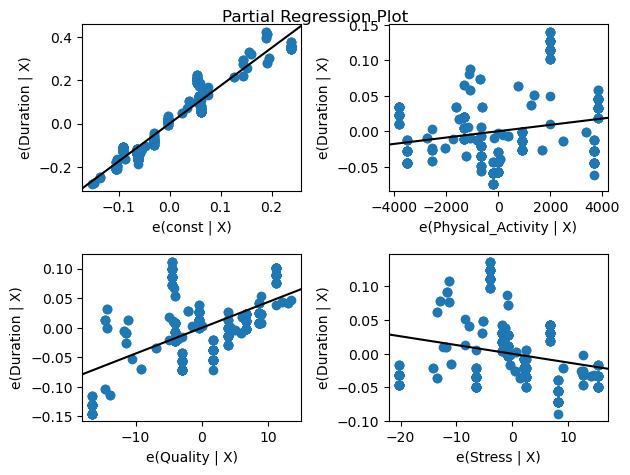

In [16]:
# Plot 1 (Partial Regression Plots on Transformed Data)
sm.graphics.plot_partregress_grid(reg_transformed)
plt.show()

Although the partial regression plot for physical activity did not improve by much, the corresponding plots for stress and quality show stark improvement. Due to the enhanced residual and partial regression plots, the new model better satisfies the assumption that the mean of errors is zero compared to the original model.

In [13]:
X = sleep[['Physical_Activity','Stress','Quality']]
Y = sleep['Duration']
X = sm.add_constant(X)
reg_original = sm.OLS(Y, X).fit()

fitted_y_original = reg_original.fittedvalues
residuals_original = reg_original.resid

fitted_y_transformed = reg_transformed.fittedvalues
residuals_transformed = reg_transformed.resid

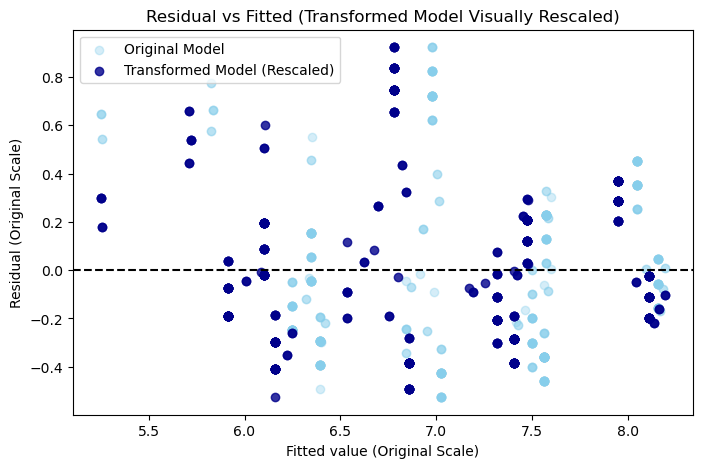

In [14]:
# Plot 3 (Overlaid Constant Variance Plot)

def rescale_to_range(values, new_min, new_max):
    old_min, old_max = values.min(), values.max()
    return (values - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    
fitted_trans_scaled = rescale_to_range(fitted_y_transformed, fitted_y_original.min(), fitted_y_original.max())

residuals_trans_scaled = rescale_to_range(residuals_transformed, residuals_original.min(), residuals_original.max())

plt.figure(figsize=(8,5))

plt.scatter(fitted_y_original, residuals_original, color='skyblue', alpha=0.35, label='Original Model')

plt.scatter(fitted_trans_scaled, residuals_trans_scaled, color='darkblue', alpha=0.8, label='Transformed Model (Rescaled)')

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Fitted value (Original Scale)")
plt.ylabel("Residual (Original Scale)")
plt.legend()
plt.title("Residual vs Fitted (Transformed Model Visually Rescaled)")
plt.show()

The residual-versus-fitted values plot also improved from before. The transformation shifted the large positive residuals down and brought the residuals closer to the line. Thus, the new model strengthens the assumption that errors have a constant variance.

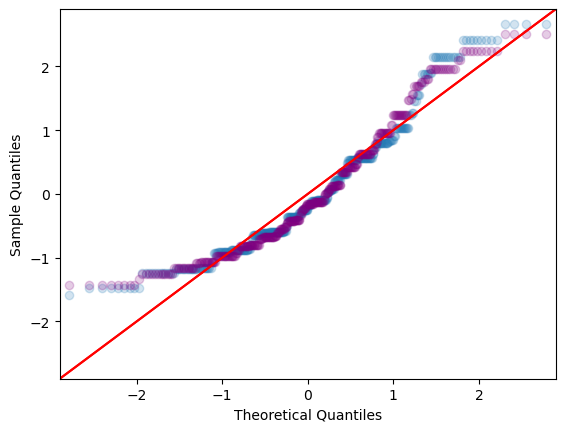

In [15]:
# Plot 3 (Overlapping QQplot)
residuals_original = reg_original.resid

fig, ax = plt.subplots()

sm.qqplot(residuals_transformed, fit = True, line='45', alpha = 0.2, ax=ax)
sm.qqplot(residuals_original, fit = True, line='45', markerfacecolor='purple', markeredgecolor='purple', alpha = 0.2, ax=ax)

plt.show()

Unfortunately, the QQ plot of the transformed data performed slightly worse than the untransformed data. The points at both ends deviate somewhat more, so the points do not lie along the idealized line as much.

### Real-World Interpretation of Covariates

In [20]:
print(reg_transformed.params)

const                1.742561
Physical_Activity    0.000004
Quality              0.004368
Stress              -0.001296
dtype: float64


While Sleep Quality appears to have the most positive correlation with Sleep Duration, that is to be expected since it’s more of an outcome of sleeping rather than a factor prior to it. A longer period of sleep would likely be a major factor in many people’s definition of Sleep Quality, but it is relieving to see the model reflect this expected relationship.

In the Stress coefficient, we notice a negative correlation with Sleep Duration. The magnitude of this relationship is smaller than that of Sleep Quality, implying that stress will shorten Sleep Duration. This relationship is to be expected given the context of human health, and is a sign of sensible model results in future predictions.

Finally, when comparing the regression coefficient for Physical Activity against the other covariates ($\beta = 4.473e^{-6}$), you might be left with the conclusion that it contributes extremely little to predicting Sleep Duration. However, once you account for the fact that Physical Activity data is roughly on a scale of two orders of magnitude larger (after the feature transformation) than those of Stress and Sleep Quality, we see that Physical Activity does contribute in a smaller but still significant way to predicting Sleep Duration, which is also what we would expect given the domain knowledge of human health.

Bringing it all together, our constructed model hypothesizes that if there were only three factors that contribute to Sleep Duration (namely Sleep Quality, Stress, and Physical Activity), then Sleep Duration is most impacted by Sleep Quality, Stress, and Physical Activity in that order.